In [1]:
import numpy as np
import pandas as pd
import os
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import r2_score as R2, mean_absolute_error as MAE, mean_squared_error as MSE, accuracy_score as acs
from category_encoders import TargetEncoder
import matplotlib.pyplot as plt
import pickle

In [2]:
pwd=os.getcwd()

In [3]:
# Load the dataset
# Replace 'your_dataset.csv' with the actual filename
df = pd.read_csv('DataFinalProject.csv')


In [4]:
df.describe()

,Ref_ID,Cell_area_measured,Perovskite_band_gap,DMF/DMSO,JV_default_Voc,JV_default_Jsc,JV_default_FF,JV_default_PCE
count,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000
mean,20196.203078,0.162207,1.598183,5.825781,0.992308,19.451967,0.676287,13.632883
std,12488.396815,0.841673,0.077544,4.186888,0.145418,4.194859,0.125794,4.531934
min,16.000000,0.000400,1.220000,0.091142,0.000000,0.000000,0.000000,0.000000
25%,8771.750000,0.090000,1.600000,4.000000,0.960000,18.470000,0.632000,11.270000
50%,20328.000000,0.100000,1.600000,4.000000,1.028000,20.690000,0.705000,14.700000
75%,31716.250000,0.100000,1.600000,9.000000,1.070000,22.050000,0.750000,17.000000
max,42467.000000,36.000000,2.580000,99.000000,1.653000,25.980000,3.040000,22.200000


In [5]:
df.shape

(5264, 15)

In [6]:
df.columns.to_list()

['Ref_ID',
 'Ref_DOI_number',
 'Cell_stack_sequence',
 'Cell_area_measured',
 'Perovskite_composition_a_ions',
 'Perovskite_composition_b_ions',
 'Perovskite_composition_c_ions',
 'Perovskite_composition_short_form',
 'Perovskite_band_gap',
 'Perovskite_deposition_solvents',
 'DMF/DMSO',
 'JV_default_Voc',
 'JV_default_Jsc',
 'JV_default_FF',
 'JV_default_PCE']

In [7]:
df.dtypes

Ref_ID                                 int64
Ref_DOI_number                        object
Cell_stack_sequence                   object
Cell_area_measured                   float64
Perovskite_composition_a_ions         object
Perovskite_composition_b_ions         object
Perovskite_composition_c_ions         object
Perovskite_composition_short_form     object
Perovskite_band_gap                  float64
Perovskite_deposition_solvents        object
DMF/DMSO                             float64
JV_default_Voc                       float64
JV_default_Jsc                       float64
JV_default_FF                        float64
JV_default_PCE                       float64
dtype: object

In [8]:
col=['Ref_ID','Ref_DOI_number','Perovskite_deposition_solvents']
df.drop(columns=col, inplace=True)

In [9]:
df.dtypes

Cell_stack_sequence                   object
Cell_area_measured                   float64
Perovskite_composition_a_ions         object
Perovskite_composition_b_ions         object
Perovskite_composition_c_ions         object
Perovskite_composition_short_form     object
Perovskite_band_gap                  float64
DMF/DMSO                             float64
JV_default_Voc                       float64
JV_default_Jsc                       float64
JV_default_FF                        float64
JV_default_PCE                       float64
dtype: object

In [10]:
# Select feature list and target variable
X = df.iloc[:,1:-4] # We don't need Ref_DOI column
y = df.iloc[:,-4:]  # Target Variables are 'JV_default_Voc','JV_default_Jsc', 'JV_default_FF', 'JV_default_PCE'
print(f"Shape of X: {str(X.shape)}\nShape of y: {str(y.shape)}")


Shape of X: (5264, 7)
Shape of y: (5264, 4)


In [11]:
X.dtypes

Cell_area_measured                   float64
Perovskite_composition_a_ions         object
Perovskite_composition_b_ions         object
Perovskite_composition_c_ions         object
Perovskite_composition_short_form     object
Perovskite_band_gap                  float64
DMF/DMSO                             float64
dtype: object

In [12]:
def convert_to_num(val):
    """
    Some thickness data have individual layer thickness seperated by '|' which are considered as string type data.
    This function takes the sum of each layer and converts it into float type data. 
    """
    if isinstance(val, str):
        # split the string by '|'
        nums = val.split('|')
        # convert each element to float and sum them up
        total = sum([float(num) if num != 'nan' else 0 for num in nums])
        # return empty string if total is 0, else return the total
        return np.nan if total == 0 else total
    # if the value is not a string, return the original value
    return val


In [13]:
# Seperating features of different datatypes
numerical = list(X.select_dtypes(include='float64')) 
categorical = list(X.select_dtypes(include='object'))
print("No. of Numerical Features = "+str(len(numerical)))
print("No. of Categorical Features = "+str(len(categorical)))


No. of Numerical Features = 3
No. of Categorical Features = 4


In [14]:
# Converting TRUE and FALSE data to 1 and 0

X[categorical] = X[categorical].astype('category')



In [15]:
X

,Cell_area_measured,Perovskite_composition_a_ions,Perovskite_composition_b_ions,Perovskite_composition_c_ions,Perovskite_composition_short_form,Perovskite_band_gap,DMF/DMSO
0,0.16,MA,Sn,I,MASnI,1.22,10.0
1,0.09,MA,Sn,I,MASnI,1.25,9.0
2,0.05,MA,Pb,I,MAPbI,1.30,9.0
3,0.05,MA,Pb,I,MAPbI,1.30,9.0
4,0.05,MA,Pb,I,MAPbI,1.30,9.0
...,...,...,...,...,...,...,...
5259,0.12,MA,Pb,Br,MAPbBr,2.32,9.0
5260,0.12,MA,Pb,Br,MAPbBr,2.32,9.0
5261,0.12,MA,Pb,Br,MAPbBr,2.32,9.0
5262,0.12,MA,Pb,Br,MAPbBr,2.32,9.0


In [16]:

# Printing No. of Unique labels on each feature
print("Columns: No. of unique labels")
for c in categorical:
    print(c+": "+str(len(X[c].unique())))


Columns: No. of unique labels
Perovskite_composition_a_ions: 3
Perovskite_composition_b_ions: 3
Perovskite_composition_c_ions: 2
Perovskite_composition_short_form: 9


In [17]:
X_Jsc, X_Voc, X_FF, X_PCE = X.copy(), X.copy(), X.copy(), X.copy() # Four copy of features columns
y_Jsc, y_Voc, y_FF, y_PCE = y['JV_default_Jsc'], y['JV_default_Voc'], y['JV_default_FF'], y['JV_default_PCE'] # Copy of Target variables


In [18]:
TE_PCE=TargetEncoder() #Loading target encoder for PCE
TE_PCE.fit(X_PCE[categorical],y_PCE) # Fitting encoder with PCE column
X_PCE[categorical]=TE_PCE.transform(X_PCE[categorical]) #Encoding categorical features

In [19]:
X_PCE.head()

,Cell_area_measured,Perovskite_composition_a_ions,Perovskite_composition_b_ions,Perovskite_composition_c_ions,Perovskite_composition_short_form,Perovskite_band_gap,DMF/DMSO
0,0.16,13.770413,3.446548,13.706633,9.219297,1.22,10.0
1,0.09,13.770413,3.446548,13.706633,9.219297,1.25,9.0
2,0.05,13.770413,13.740676,13.706633,13.887335,1.30,9.0
3,0.05,13.770413,13.740676,13.706633,13.887335,1.30,9.0
4,0.05,13.770413,13.740676,13.706633,13.887335,1.30,9.0


In [20]:
df_PCE = pd.concat([X_PCE,y_PCE],axis=1) # Joining target variable column with encoded feature columns
df_PCE.head()

,Cell_area_measured,Perovskite_composition_a_ions,Perovskite_composition_b_ions,Perovskite_composition_c_ions,Perovskite_composition_short_form,Perovskite_band_gap,DMF/DMSO,JV_default_PCE
0,0.16,13.770413,3.446548,13.706633,9.219297,1.22,10.0,0.00
1,0.09,13.770413,3.446548,13.706633,9.219297,1.25,9.0,0.17
2,0.05,13.770413,13.740676,13.706633,13.887335,1.30,9.0,2.00
3,0.05,13.770413,13.740676,13.706633,13.887335,1.30,9.0,12.80
4,0.05,13.770413,13.740676,13.706633,13.887335,1.30,9.0,6.50


In [21]:
X=df_PCE.iloc[:,:-1]
y=df_PCE['JV_default_PCE']
print(f"Shape of X: {str(X.shape)}\nShape of y:{str(y.shape)}")

Shape of X: (5264, 7)
Shape of y:(5264,)


In [22]:
X.head()

,Cell_area_measured,Perovskite_composition_a_ions,Perovskite_composition_b_ions,Perovskite_composition_c_ions,Perovskite_composition_short_form,Perovskite_band_gap,DMF/DMSO
0,0.16,13.770413,3.446548,13.706633,9.219297,1.22,10.0
1,0.09,13.770413,3.446548,13.706633,9.219297,1.25,9.0
2,0.05,13.770413,13.740676,13.706633,13.887335,1.30,9.0
3,0.05,13.770413,13.740676,13.706633,13.887335,1.30,9.0
4,0.05,13.770413,13.740676,13.706633,13.887335,1.30,9.0


In [23]:
#scaling features
scaler=MinMaxScaler()
X[X.columns]=scaler.fit_transform(X[X.columns])

In [24]:
X.head()

,Cell_area_measured,Perovskite_composition_a_ions,Perovskite_composition_b_ions,Perovskite_composition_c_ions,Perovskite_composition_short_form,Perovskite_band_gap,DMF/DMSO
0,0.004433,1.0,0.0,1.0,0.428149,0.000000,0.100182
1,0.002489,1.0,0.0,1.0,0.428149,0.022059,0.090071
2,0.001378,1.0,1.0,1.0,1.000000,0.058824,0.090071
3,0.001378,1.0,1.0,1.0,1.000000,0.058824,0.090071
4,0.001378,1.0,1.0,1.0,1.000000,0.058824,0.090071


In [25]:
X_train, X_test, y_train, y_test = TTS(X,y,test_size=0.2,random_state=42) # 70-30 split into train and test subsets
print(f"X_train: {X_train.shape} \nX_test: {X_test.shape} \ny_train: {y_train.shape} \ny_test: {y_test.shape}")



X_train: (4211, 7) 
X_test: (1053, 7) 
y_train: (4211,) 
y_test: (1053,)


In [26]:
def parity_plot(predicted_train, predicted_test, y1=y_train, y2=y_test):
    """ Plots the Predicted PCE vs Actual PCE"""
    plt.style.use('default')
    plt.figure(figsize=(5,5))
    plt.scatter(y1, predicted_train, c='r', label='Training data', edgecolors=(0, 0, 0), marker="o",s=100)
    plt.scatter(y2, predicted_test, c='b',label='Test data', edgecolors=(0, 0, 0), marker="o",s=100)
    plt.plot([-1.0, 26.0], [-1.0, 26.0],'k--', lw=2)
    plt.xlim(-1.0, 26.0)
    plt.ylim(-1.0, 26.0)
    plt.xlabel('Actual PCE (%)')
    plt.ylabel('Predicted PCE (%)')
    plt.legend(loc='upper left')
    
    return plt.show()

def get_evaluation(train_pred_y,test_pred_y):
    """ Gets ML model metrics Mean Square Error, Root Mean Square Error, Mean Absolute Error and R2 Score """
    # Metrics for Training Dataset
    mse_train = MSE(y_train, train_pred_y)
    rmse_train = np.sqrt(mse_train)
    mae_train = MAE(y_train, train_pred_y)
    r2_train = R2(y_train,train_pred_y)
    r_train=pearsonr(y_train, train_pred_y)
    
    # Metrics for Test Dataset
    mse_test = MSE(y_test, test_pred_y)
    rmse_test = np.sqrt(mse_test)
    mae_test = MAE(y_test, test_pred_y)
    r2_test = R2(y_test,test_pred_y)
    r_test=pearsonr(y_test, test_pred_y)
    
    eval_df = pd.DataFrame({
        "Metrics":["Mean Square Error (MSE)","Root Mean Square Error (RMSE)","Mean Absolute Error (MAE)","R2_Score","r"],
        "Training Data": [mse_train,rmse_train,mae_train,r2_train,r_train],
        "Test Data": [mse_test,rmse_test,mae_test,r2_test,r_test]
    })
    return eval_df


In [27]:
def model_builder(model_name):
    model_name.fit(X_train, y_train)
    y_pred_train = model_name.predict(X_train)
    y_pred_test = model_name.predict(X_test)
    parity_plot(y_pred_train,y_pred_test)
    eval_df = get_evaluation(y_pred_train,y_pred_test)
    return eval_df

rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto','sqrt', 'log2', None]  
}


In [28]:
# Define the search object
search = RandomizedSearchCV(rf, param_grid, cv=5, n_iter=50, n_jobs=-1, random_state=42)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')


C:\Users\Rhythm Shah\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rhythm Shah\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rhythm Shah\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Rhythm Shah\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Rhythm Sh

Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}


In [29]:

# Get the best model
best_rf = search.best_estimator_


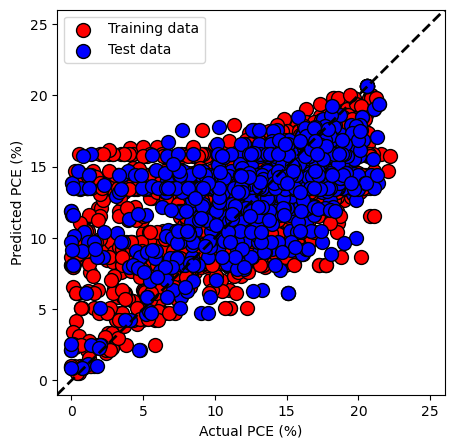

,Metrics,Training Data,Test Data
0,Mean Square Error (MSE),11.616407,13.079994
1,Root Mean Square Error (RMSE),3.408285,3.616627
2,Mean Absolute Error (MAE),2.464603,2.706309
3,R2_Score,0.436989,0.350485
4,r,"(0.6613545384709753, 0.0)","(0.5938442057058009, 2.343699757501759e-101)"


In [30]:
best_rf_metrics = model_builder(best_rf) # building RF model
best_rf_metrics # evaluation metrics



In [31]:
features = X.columns
importances = best_rf.feature_importances_ # feature importance values


In [32]:
imp_df = pd.DataFrame({"Features": features, "Importance": importances}) # creating feature importance dataframe
imp_df_sorted = imp_df.sort_values(by=["Importance"]) # sorting values
imp_df_sorted


,Features,Importance
1,Perovskite_composition_a_ions,0.019990
3,Perovskite_composition_c_ions,0.025324
2,Perovskite_composition_b_ions,0.038024
4,Perovskite_composition_short_form,0.089057
5,Perovskite_band_gap,0.154662
6,DMF/DMSO,0.303266
0,Cell_area_measured,0.369677


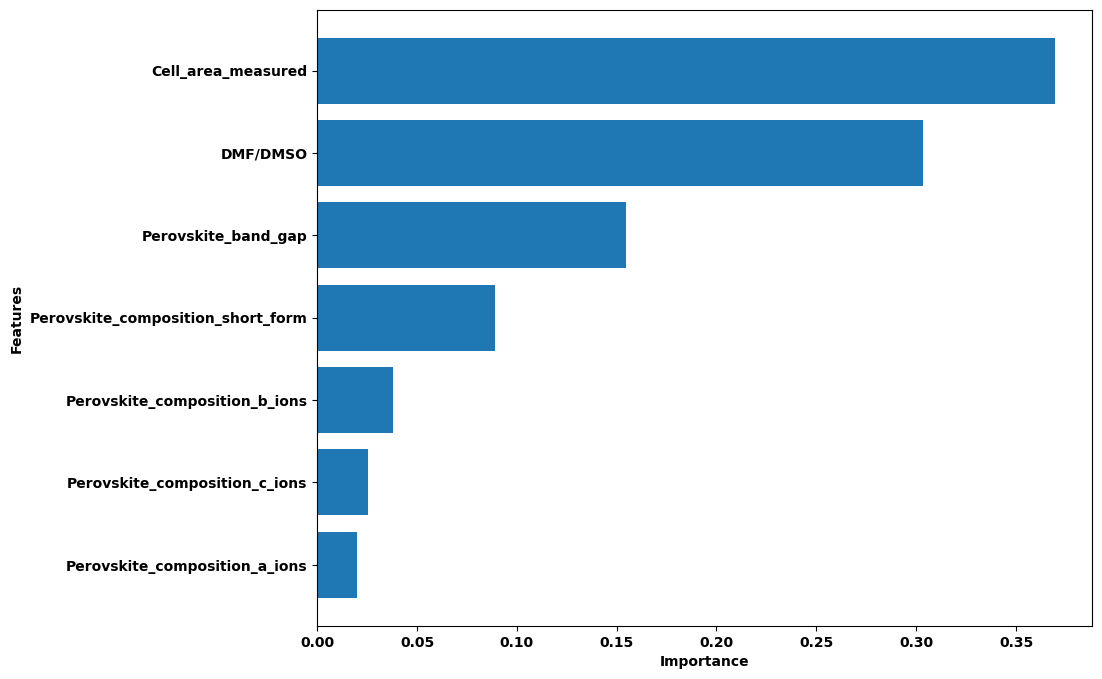

In [33]:
# Feature Importance plot
fig = plt.figure(figsize=(10,8))
plt.rcParams['font.weight']='bold'
plt.barh(imp_df_sorted["Features"],imp_df_sorted["Importance"])
plt.xlabel("Importance",weight='bold')
plt.ylabel("Features",weight='bold')
plt.show()